# How Strong is Dota 2 Hero Magnus in Current Patch 7.31

*Yizhou Li*

---
## Introduction

Dota 2 (Defense of the Ancients 2) was designed by IceFrog and published by Valve in 2013. It was originally a game mode for Blizzard Entertainment's Warcraft III: Reign of Chaos. It was one of the greatest video games in all times, and it was rated high by IGN: 9.4/10, GameSpot: 9/10, etc. As I was writting this document in May 2 2022 7:00 pm, there were still around 361,449 players playing this game.

<img src="steam_stats.png" width="800" height="400">

Dota 2 is a type of MOBA (multiplayer online battle arena) game. There are two sides in Dota 2, one is called Dire, which always appeared at upper right corner of the map. The other is called Radiant, which always appeared at lower left corner of the map. There are 10 player in total, and they will be randomly assigned as 5 players in Dire and 5 players in Radiant. Before the match started, players need to pick a hero to control. Generally, heroes are classified by role of carry, mid, tank, support. In order to win the game, players should have all these roles in their teams and cooperate with each other. Although sometimes players can win with only one or two roles in their teams, the best practices of winning the game is to have all of these roles. Heores can have the same roles, but each heroes are unique. For example, they have unique skills, damage, health, strong periods, etc. After picking a hero, the players will see a map like this:

<img src="map.png" width="800" height="400">

As the map shows, there are three roads leading to opposite team's base. Every 30 seconds, creeps spawn in both team's base, and follow the three routes to attack. Players can choose one route, and follow creeps to attack the other team. However, the enemy heroes controlled by enemy team, creeps and defense towers will slow down the pace of attacking. To destroy enemy team's base, you have to use the strength of your hero, and try to kill enemy players and creeps to accumulate experience and gold. More experience and gold will solidify your skills, and allow you to purchase more pwerful items at your base. In the end, one team will destroy the other team's base, and the game is over.

As a pro Dota player with 1500h+ play time and 5 years game experience, I am deeply interested in heroes' gameplay strategy, lineup matching, and winning percentage against different heroes. Recently, I paid special attention to Magnus, which is a hero charactrized by high strength, able to hardly lock down enemy heroes, and an great initiator. Why do I analyze this hero? It's because in TI 10 (The International is the biggest annual event hosted by Valve. It gathers top ranking Dota teams around the world to compete in this championship, and it has total prize pool of 40 million dollars funded by Dota 2 comunity) final match PSG.LGD vs Team Spirit, Magnus was picked 4 times, and there were only 5 matches in total. So many great and decisive moments were created as Magnus played by Team Spirit. It's the Magnus' long lasting ulitimate and blink dagger pushing enemies back made Team Spirit chamipion of the Ti10.

<img src="Dota2_TI10_Magnus.jpeg" width="800" height="400">



Dota 2 official site: https://www.dota2.com/home
Dota 2 Steam store site: https://store.steampowered.com/app/570/Dota_2/
Dota 2 Wikipedia: https://en.wikipedia.org/wiki/Dota_2
Dota 2 Reddit: https://www.reddit.com/r/DotA2/


In general, we will go through the following stages for our topic:
1. Data collection
2. Exploratory data analysis
3. Communication of insights attained
In addition, we will examine Magnus' basic attributes, matchups, popular items, pro-players, how strong is Magnus compared to other heroes, and finally what's the win rate of this hero in public match.

Our data sources come from opendota (website: https://www.opendota.com/, api docs: https://docs.opendota.com/), as it has rich info about Dota 2 and a well documented api to do data analysis in Dota 2. Now, we import libraries we need, and make functions to call api.

In [15]:
# We use requests to make api call; json library to parse returned json objects
# ; pandas dataframe to store and procees the info.
import requests
import json
import pandas as pd

# A funtion to call api, and return the organized pandas dataframe
def call_api_and_make_a_df(link):
    r = requests.get(link)
    data = json.loads(r.text)
    df = pd.DataFrame(data)
    return df

---
## Attributes

Let's first examine some meta info about Magnus. 

In [16]:
df = call_api_and_make_a_df("https://api.opendota.com/api/heroes")

hero_df = df.copy()

df = df[df["localized_name"] == "Magnus"]
df.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
95,97,npc_dota_hero_magnataur,Magnus,str,Melee,"[Initiator, Disabler, Nuker, Escape]",4


Yeah, it's a four legs mammoth. It's primary attribute is strength. In Dota 2, each hero has a primary attribute of strength, agility, or intelligence. The stregth heroes have high health, and health region, so they are pretty tanky. The agility heroes have high attack speed and armor, so they are good at dealing physical damages. The intelligence heroes have high Mana, and Mana region, so they are good at casting spells, and dealing magical damages. Magnus is a melee hero, which means in order to attack enemies, he has to approach them. This will give him disadvantages when facing range heroes. However, Magnus has skills to run over the enemies. So don't ignore Magnus that's standing far away, because he'll be rush over your face in the next second. He is a good initiator of group fight, a disabler of stunning enemies, a nuker who deals high damages instanly, a escpaer who is not easy to kill.

The hero also has 4 unique skills. Since the api does not have the info, we will just give you a link to reference https://dota2.fandom.com/wiki/Magnus .

<img src="Screen Shot 2022-05-03 at 5.32.06 PM.png" width="800" height="400">

---
## Matchups

In [17]:
df = call_api_and_make_a_df("https://api.opendota.com/api/heroes/97/matchups")

# we calculate win rate of Magnus against others, and list the top 5 of them.
df["win rate"] = df["wins"] / df["games_played"]
df = df.sort_values(by='win rate', ascending=False).head()

print(df)

     hero_id  games_played  wins  win rate
118       80             6     5  0.833333
111        5            10     8  0.800000
112       50            10     7  0.700000
115       30             9     6  0.666667
88         6            33    22  0.666667


In [18]:
for i, r in df.iterrows():
    print(hero_df[hero_df["id"] == r["hero_id"]].get(["localized_name"]), "\n")

   localized_name
78     Lone Druid 

   localized_name
4  Crystal Maiden 

   localized_name
48         Dazzle 

   localized_name
28   Witch Doctor 

  localized_name
5    Drow Ranger 



In current patch, Magnus is best to counter the heroes above. 

---
## Players

Do you wonder who are the top most Magnus player in the world?

In [19]:
df = call_api_and_make_a_df('https://api.opendota.com/api/heroes/97/players')
print(df.head(), "\n")
print(df.info())

   account_id  games_played  wins
0   228392819           165   106
1    96169991           122    64
2    41231571           118    82
3    70388657           114    68
4   129958758            60    36 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   account_id    3402 non-null   int64
 1   games_played  3402 non-null   int64
 2   wins          3402 non-null   int64
dtypes: int64(3)
memory usage: 79.9 KB
None


Well, the api document of opendota says there will be responses such as steamid, avatar, personaname, last_login, full_history_time, country_code, fantasy_role, is_pro, etc return. Nevertheless, we can only see account_id right now. I guess they didn't make all functionalities as the document described. Therefore, we cannot see magnus players' info by scripts. If you are interested in pro Magnus players, you can always head to the link: https://master--opendota-staging.netlify.app/heroes/97/players, and see the results in realtime.

---
## Popular Items

Now, I am curious about the items build of Magnus across different ranks. So, let's explore that.

In [20]:
df = call_api_and_make_a_df('https://api.opendota.com/api/heroes/97/itemPopularity')
print(df.head(), "\n")
print(df.info())

    start_game_items  early_game_items  mid_game_items  late_game_items
11              70.0               NaN             NaN              NaN
12              11.0               NaN             NaN              NaN
13              78.0               NaN             NaN              NaN
14               2.0               NaN             NaN              NaN
16             156.0               NaN             NaN              NaN 

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 11 to 908
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_game_items  20 non-null     float64
 1   early_game_items  14 non-null     float64
 2   mid_game_items    17 non-null     float64
 3   late_game_items   15 non-null     float64
dtypes: float64(4)
memory usage: 2.3+ KB
None


Sadly, the api does not provide specific Magnus' popular items build. It only shows the number of items bought in different game periods. Further, it's hard to tell how many games a single row represents. Although, the api doesn't work, we can still find out the popular items build of Magnus manully by clicking the link: https://master--opendota-staging.netlify.app/heroes/97/items in web browser.

---
## How good is Magnus really

We want to know in recent matches how many people picked Magnus, and what's the general win rate of Magnus across different ranks?

In [21]:
df = call_api_and_make_a_df("https://api.opendota.com/api/heroStats")

# Clean and reformat the dataframe, so we only see data related to our task.
df = df[["localized_name", "1_pick", "1_win", "2_pick", "2_win", "3_pick", "3_win", "4_pick", "4_win",
"5_pick", "5_win", "6_pick", "6_win", "7_pick", "7_win", "8_pick", "8_win"]]

# Rename ranking
df = df.rename(columns={"localized_name":"Heroes", "1_pick":"Herald picks", "1_win":"Herald wins",
                        "2_pick":"Guardian picks", "2_win":"Guardian wins", "3_pick":"Crusader picks",
                        "3_win":"Crusader wins", "4_pick":"Archon picks", "4_win":"Archon wins",
                        "5_pick":"Legend picks", "5_win":"Legend wins", "6_pick":"Ancient picks",
                        "6_win":"Ancient wins", "7_pick":"Divine picks", "7_win":"Divine wins",
                        "8_pick":"Immortal picks", "8_win":"Immortal wins"})

all_hero_wp_df = df.copy()

magnus_df = all_hero_wp_df[all_hero_wp_df["Heroes"] == "Magnus"]
magnus_df.reset_index(inplace=True, drop=True)
magnus_df.head()

,Heroes,Herald picks,Herald wins,Guardian picks,Guardian wins,Crusader picks,Crusader wins,Archon picks,Archon wins,Legend picks,Legend wins,Ancient picks,Ancient wins,Divine picks,Divine wins,Immortal picks,Immortal wins
0,Magnus,8393,3871,19290,8904,26841,12678,23902,11330,14356,6928,6764,3350,3010,1477,983,480


Generally speaking, players with Herald, Guardian, or Crusader titles are newbies. Players with Archon, Legend, or Ancient titles are medium players. Players with Divine or Immortal titles are pro players. Next, we will calculate the win rate of Magnus in different ranks, and plot a few graphs to visualize the results.

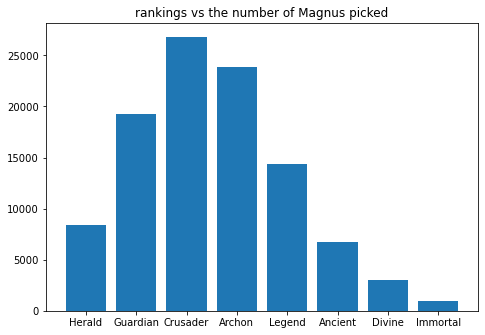

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
v = [magnus_df.at[0, "Herald picks"], magnus_df.at[0, "Guardian picks"], magnus_df.at[0, "Crusader picks"],
     magnus_df.at[0, "Archon picks"], magnus_df.at[0, "Legend picks"], magnus_df.at[0, "Ancient picks"],
     magnus_df.at[0, "Divine picks"], magnus_df.at[0, "Immortal picks"]]
ax.bar(ranks,v)
ax.set_title("rankings vs the number of Magnus picked")
plt.show()

Wait! Do people in Crusader pick Magnus the most simply because most of the Dota 2 players are concentrated in Crusader? To find out, I have to use opendota api to get the players' distribution in realtimes. However, I didn't find a api call for this, so for the sake of simplacity, I screen shooted Dota 2 players' distribution. Although I didn't do this in script, for most of the time, I think this does reflect the players' distribution in all time.

<img src="Screen Shot 2022-05-03 at 7.59.35 PM.png" width="800" height="400">

As you can see, most of the players are concentrated in Archon, but players in Crusader has most of the Magnus picked. So, people love to play Magnus in Crusader. Now, let's explore the win rate of picking Magnus in different ranks.

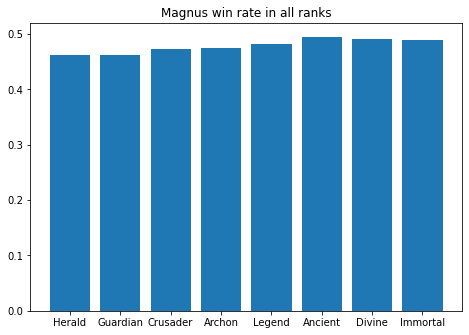

In [23]:
# draw magnus win rate in all ranks
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
v = [magnus_df.at[0, "Herald wins"]/magnus_df.at[0, "Herald picks"],
     magnus_df.at[0, "Guardian wins"]/magnus_df.at[0, "Guardian picks"],
     magnus_df.at[0, "Crusader wins"]/magnus_df.at[0, "Crusader picks"],
     magnus_df.at[0, "Archon wins"]/magnus_df.at[0, "Archon picks"],
     magnus_df.at[0, "Legend wins"]/magnus_df.at[0, "Legend picks"],
     magnus_df.at[0, "Ancient wins"]/magnus_df.at[0, "Ancient picks"],
     magnus_df.at[0, "Divine wins"]/magnus_df.at[0, "Divine picks"],
     magnus_df.at[0, "Immortal wins"]/magnus_df.at[0, "Immortal picks"]]
ax.bar(ranks, v)
ax.set_title("Magnus win rate in all ranks")
plt.show()

As illustrated in the graph, Magnus has highest win rate in Legend rank, which is around 0.45. Suprisingly, the Magnus is not so good.

---
## How does Magnus Compare to other heroes

In [24]:
# calculate win rate for all heroes across ranks
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
for r in ranks:
     all_hero_wp_df[r + " win rate"] = all_hero_wp_df[r + " wins"] / all_hero_wp_df[r + " picks"]

print("Showing top wining heroes in all ranks:\n")
for r in ranks:
     all_hero_wp_df = all_hero_wp_df.sort_values(by=r+' win rate', ascending=False)
     print(r)
     for i, row in all_hero_wp_df.head().iterrows():
          print(row["Heroes"], row[r + " win rate"])
     print("\n")

Showing top wining heroes in all ranks:

Herald
Axe 0.5643616225116
Silencer 0.5549350047557495
Sand King 0.5418466263556964
Undying 0.540991512345679
Chaos Knight 0.5377015988270614


Guardian
Axe 0.5547245033563908
Silencer 0.5431111111111111
Jakiro 0.538897162153659
Juggernaut 0.5383174607748498
Undying 0.5372532470577203


Crusader
Juggernaut 0.5471847009772329
Axe 0.5433308743457337
Arc Warden 0.5431278045537643
Omniknight 0.5396442819148937
Huskar 0.5380952380952381


Archon
Arc Warden 0.5550449346405228
Juggernaut 0.5518516062725857
Huskar 0.5499906838084591
Omniknight 0.5488085380439783
Axe 0.5360289565175977


Legend
Arc Warden 0.5574940523394132
Huskar 0.5510822237647505
Omniknight 0.5494098270656053
Juggernaut 0.5492722640349079
Visage 0.5487804878048781


Ancient
Visage 0.5636215334420881
Arc Warden 0.5568650559811432
Meepo 0.5556464811783961
Lone Druid 0.5545023696682464
Omniknight 0.5527707518969878


Divine
Broodmother 0.575098814229249
Lone Druid 0.5719201651754989
Omni

It turns out, no matter which rank you are in, the top heros' win rate are around 0.55. Maybe Magnus is shining in a big championship like TI, but it's really not good enough for a regular public match. Thus, be careful to pick Magnus, as you might want to punch the monitor, throw away the keyboard, and scream and yell after you lose the game.

A pro tip: If you play Dota 2, don't feel too struggle with in-game techniques. Just pick the top winning heroes or the heroes that counter enemy the most. 

---
## Conclusion

In conclusion, as I research statistics about Magnus, I found out lots of good resources such as Dota buff, opendota, datdota, Dota 2 official website, etc. However, only opendota has relatively clear and well documented api to use, rather than just telling you the results on the web, or vague description about the api usage. Therefore, if you want to do Dota 2 analysis, opendota can be your best choice. You can find information about players, matches, heroes, etc in Dota 2. Although opendota did a great job on providing information, it doesn't has more detailed information such as how many times Roshan (a powerful neutral creep in the game) get killed in a game? Or, where did experiences or gold of a hero get? If you want detailed information like this, you will have to collect by yourself, and make it into csv or json to analyse later. 

Apart from the data sources, we can clearly understand the Magnus as a notorious initiator, gankers, and had shocked the Dota 2 fans in TI 10 is not strong in current patch. It is only powerful when you have good team mates, and they are willing to assist you. Other than that don't pick him, don't even practice him. Pick heroes such as Juggernaut, Tiny, Chaos Knnight who has high win rate in current patch and can carry the game without the team mates. 